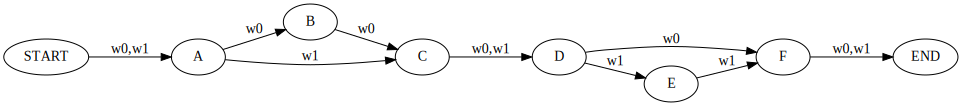

In [16]:
# get ready to visualize the decision tree in SVG
import graphviz
from IPython.display import SVG
from collections import defaultdict

# node id values must be strings for graphviz
a = graphviz.Digraph(format="svg")
a.clear()
a.attr(rankdir = "LR")

# create nodes
w0 = ['START','A', 'B', 'C', 'D', 'F', 'END']
w1 = ['START','A', 'C', 'D', 'E', 'F','END']
witnesses = [w0, w1]
tokens = []
for witness in witnesses:
    for token in witness:
        if token not in tokens:
            tokens.append(token)
            a.node(token)

# create edges
witness_edges = { # edges for each witness
    'w0': zip(w0, w0[1:]),
    'w1': zip(w1, w1[1:])
}
all_edges = defaultdict(list) # keys are (source, target) tuples, values are lists of sigla

# add edges for each witness to single inventory
for siglum, edges_by_witness in witness_edges.items():
    for edge_by_witness in edges_by_witness:
        all_edges[edge_by_witness].append(siglum)

# add edges to graph
for edge_endpoint, sigla in all_edges.items():
    a.edge(edge_endpoint[0], edge_endpoint[1], label=",".join(sigla))



SVG(a.view()) # this doesn't seem to work; need to run it in the calling program